Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Load and visualize dataset

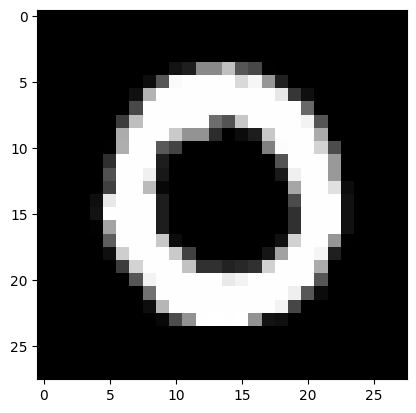

In [2]:
#Load data
train_data = pd.read_csv('Train.csv')

#Split data and labels
X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]

#Process data
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)

#Visualize data as image on chosen index
plt.imshow(X[1].reshape(28, 28), cmap='gray')

SINGLE NEURON 

In [ ]:
def single_neuron(inputs):
    
    l = len(inputs)
    
    weights = np.random.rand(1,l)
    bias    = np.random.rand(1,1)
    out     = np.dot(weights,inputs) + bias
    return(out)

LAYER OF NEURONS

ACTIVATION FUNCTION 

SOFTMAX

LOSS AND ENTROPY 

BACKPROP 

OPTIMIZER

LEARNING AND TRAINING 

CONVOLUTION

PARAMETERS:
+ Image  : 3D ARRAY
+ K      : Kernel (or filters) small matrix slide on images pixel 
+ padding: The ammount pixel 
+ stride : jump of the kernel 

In [ ]:
def my_Convulution(*Image, K, padding = 0, stride = 1):
    
    [xImgShape , yImgShape, numChan] = Image.shape #Lay kich thuoc cua hinh anh ban dau     
    [xK, yK] = K.shape                             #Kich thuoc cua kernel

    #Su dung cong thuc tinh chap de tinh dau ra cua chieucao(x_output) va chieu rong(y_output)
    xOutput = int((xImgShape - xK + 2*padding)/stride + 1)
    yOutput = int((yImgShape - yK + 2*padding)/stride + 1)
    
    output  = np.zeros((xOutput, yOutput, numChan))
    
    imagePadded = np.zeros((xImgShape + 2*padding, yImgShape + 2*padding,  numChan))

    imagePadded[int(padding):int(padding + xImgShape),\
                int(padding):int(padding + yImgShape),:] = Image
    
    for c in range(numChan):  
        for y in range(yOutput):
            for x in range(xOutput):
                y_start = y*stride
                y_end   = y_start + yK
                x_start = x*stride
                x_end   = x_start + xK

                current_slice = imagePadded[x_start:x_end, y_start:y_end, c]
                s             = np.multiply(current_slice, K)
                output[x,y,c] = np.sum(s)
                
    plt.imshow(output.sum(2), cmap = 'gray')
    plt.title('after convolution with padding'\
                    '=' + str(padding) + ' and  stride=' + str(stride))
    plt.show()
    return(output)

POOLING

SIGMOID AND TANH

FLATTENING

BACKPROB AGAIN 

TESTING